In [193]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sns as sns

from sklearn.metrics import mean_absolute_error

In [194]:
import seaborn as sbn

from datetime import datetime
from datetime import date

In [195]:
def logtransform(dataframe, cols):
    for col in cols:
        dataframe['log_' + col ] = dataframe[col].apply(lambda x: np.log10(int(x)+1))
    return dataframe

In [196]:
def logtransformdrop(dataframe, cols):
    for col in cols:
        dataframe['log_' + col ] = dataframe[col].apply(lambda x: np.log10(int(x)+1))
    dataframe = dataframe.drop(cols,axis=1)
    return dataframe

In [209]:
# Load the training data
train_data = pd.read_csv("data/train.csv")

# Load the evaluation data
eval_data = pd.read_csv("data/evaluation.csv")

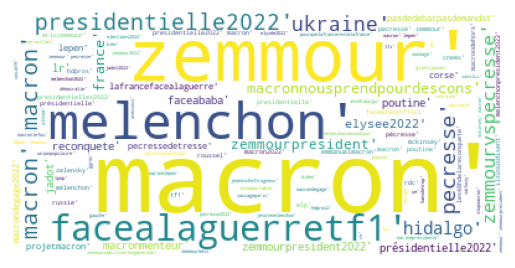

In [198]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

full_text = " ".join(i for i in train_data.hashtags)

wordcloud = WordCloud(background_color = 'white').generate(full_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [210]:
#mentions is always empty -> DROP Mention
train_data = train_data.drop(['mentions'], axis=1)

#Tweet id is not relevant -> DROP Tweet id
train_data = train_data.drop(['TweetID'], axis=1)

#add a column to data which counts url
train_data['url_count'] = train_data['urls'].str.count('http')
train_data = train_data.drop(['urls'], axis=1)

#add a column to data which counts words in hashtags
train_data['hashtag_count'] = train_data['hashtags'].str.count(' ')
train_data = train_data.drop(['hashtags'], axis=1)

#add a column to data which makes followers/friends
train_data['followers_friends'] = train_data['followers_count'] / (train_data['friends_count'].apply(lambda x: x+1))

In [211]:
#add columns related to timestamp
train_data["hour"] = train_data.timestamp.apply(lambda t: (datetime.fromtimestamp(t//1000)).hour)
train_data["day"] = train_data.timestamp.apply(lambda t: (datetime.fromtimestamp(t//1000)).weekday())
#train_data["month"] = train_data.timestamp.apply(lambda t: (datetime.fromtimestamp(t//1000)).month)
#train_data["days_passed"] = train_data.timestamp.apply(lambda t: (date.fromtimestamp(t//1000) - date(2022, 1, 1)).days)

#testing
print(train_data["timestamp"][0])
print(train_data["hour"][0])
print(train_data["day"][0])
#print(train_data["month"][0])
#print(train_data["days_passed"][0])

1646978048000
6
4


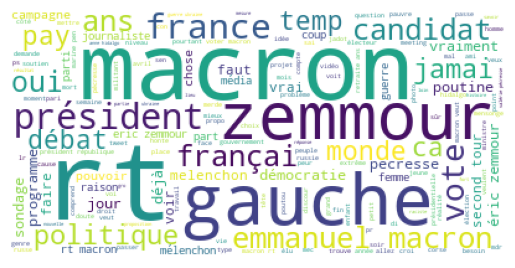

In [201]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

full_text = " ".join(i for i in train_data.text)

wordcloud = WordCloud(background_color = 'white').generate(full_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

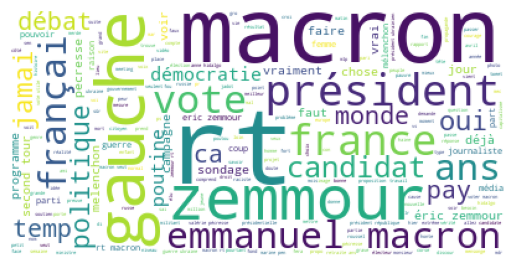

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

full_text = " ".join(train_data.text[len(train_data.text) - 1 - i] for i in range(len(train_data.text)))

wordcloud = WordCloud(background_color = 'white').generate(full_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [212]:
from textblob import TextBlob #pip install textblob-fr
from textblob_fr import PatternTagger, PatternAnalyzer

#add columns related to sentiment analysis
train_data['polarity']=train_data['text'].apply(lambda x: TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0])
train_data['subjectivity']=train_data['text'].apply(lambda x: TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[1])

#drop the text column
train_data = train_data.drop(['text'], axis=1)

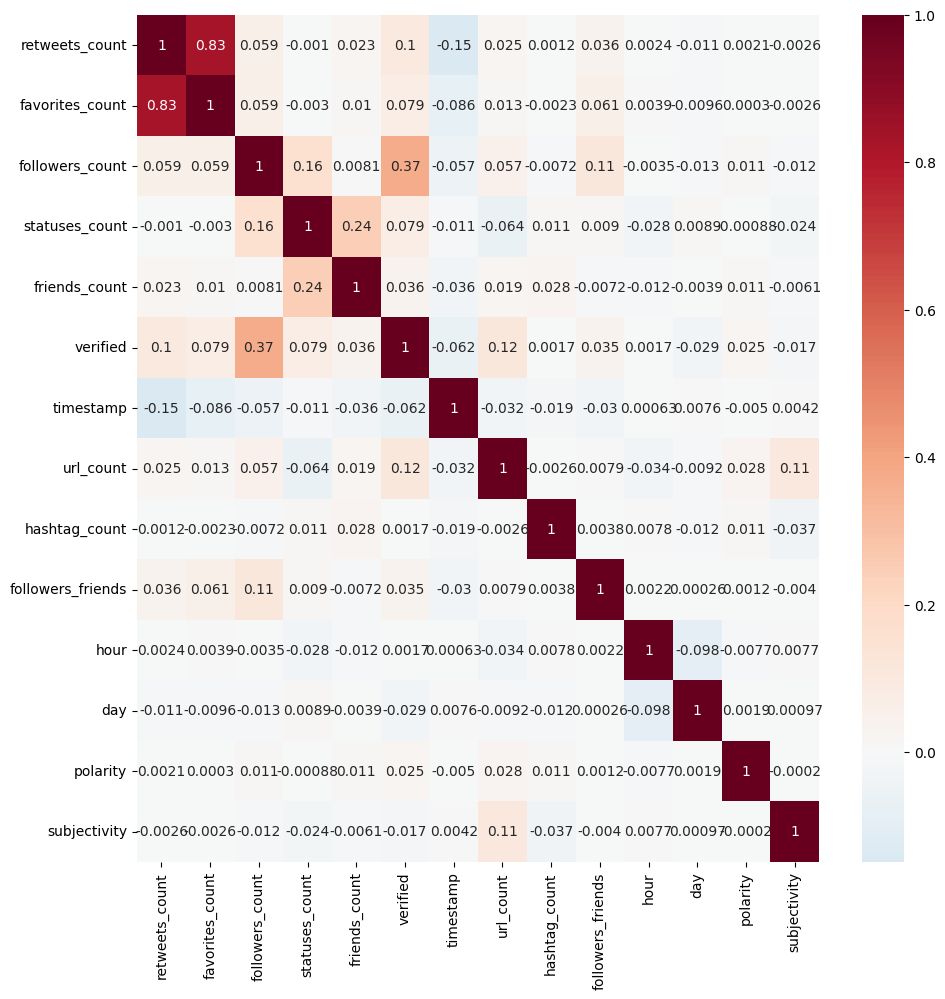

In [213]:
plt.figure(figsize=(11, 11))

sbn.heatmap(train_data.corr(), annot=True, cmap="RdBu_r", center=0);

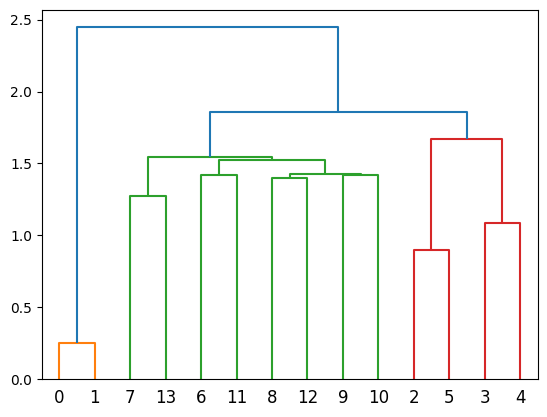

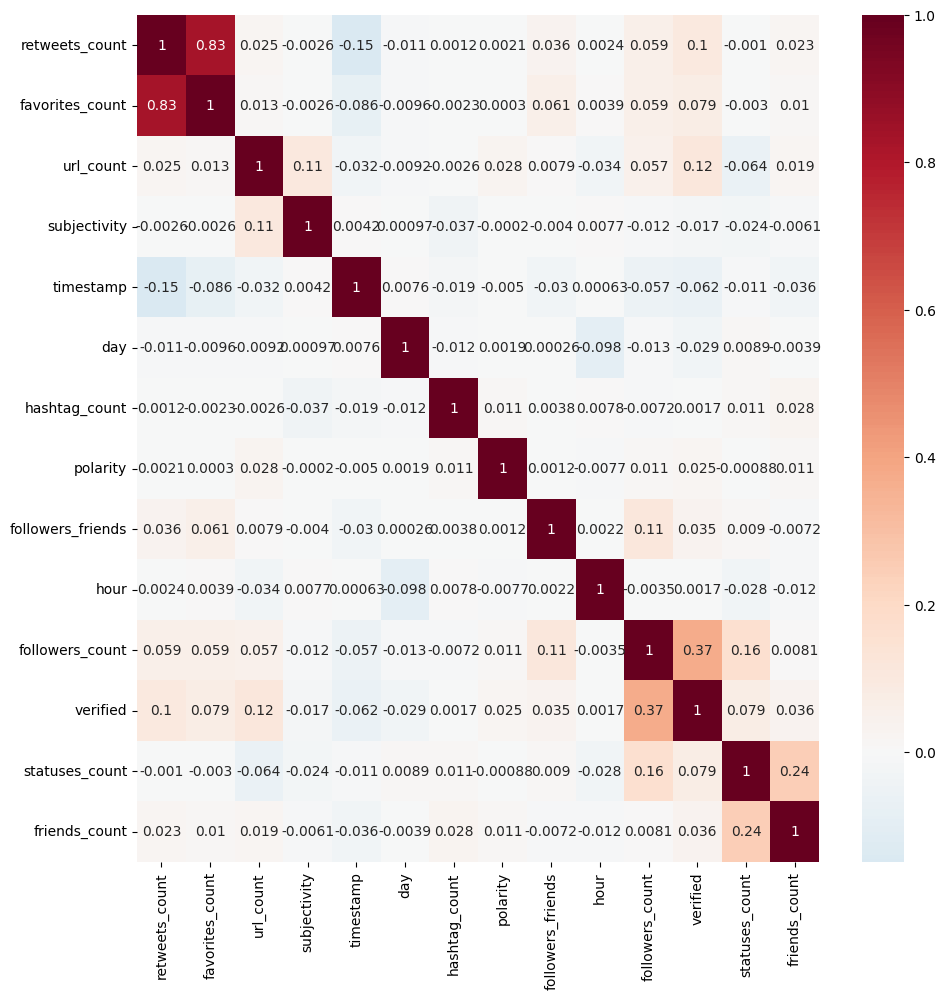

In [214]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(
    hierarchy.ward(train_data.corr()),no_plot=False)['ivl'], dtype="int")

rearranged_cov = train_data.corr().iloc[order, order]

plt.figure(figsize=(11, 11))

sbn.heatmap(rearranged_cov, annot=True, cmap="RdBu_r", center=0);

In [215]:
train_data = logtransformdrop(train_data, ['retweets_count', 'followers_count', 'friends_count', 'favorites_count'])

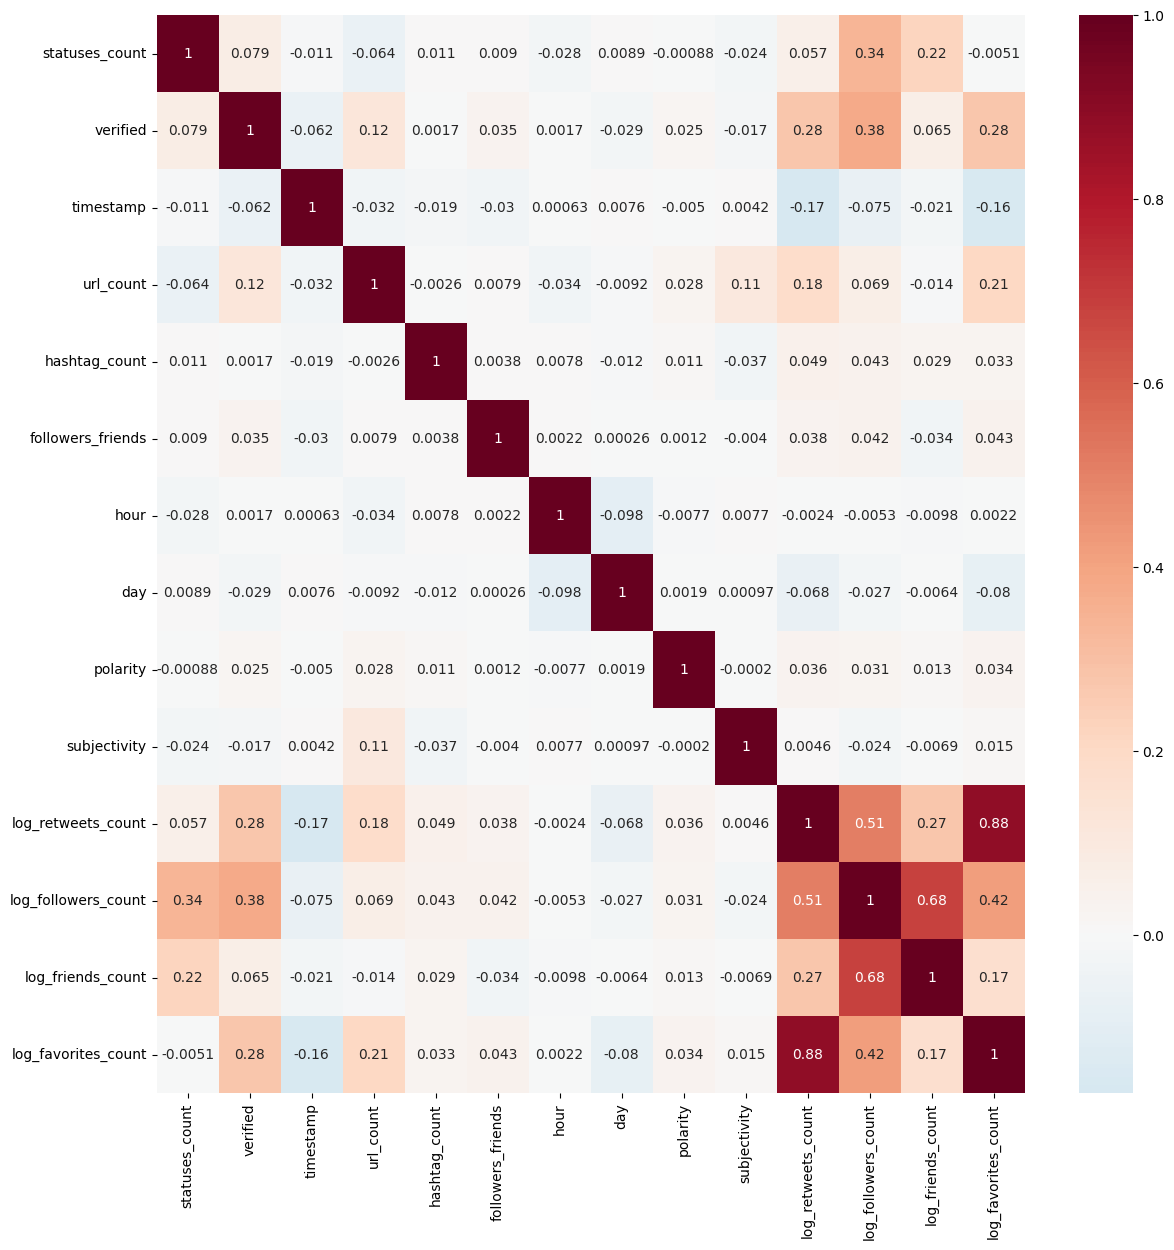

In [216]:
plt.figure(figsize=(14, 14))

sbn.heatmap(train_data.corr(), annot=True, cmap="RdBu_r", center=0);

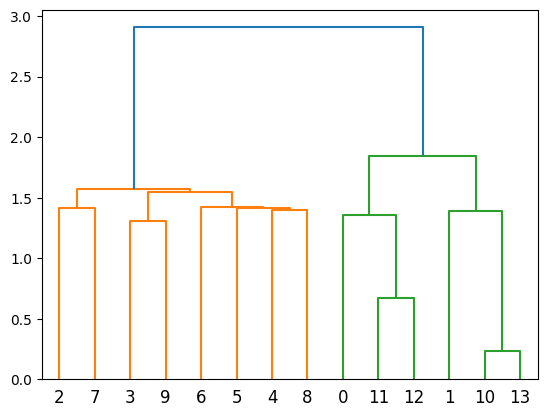

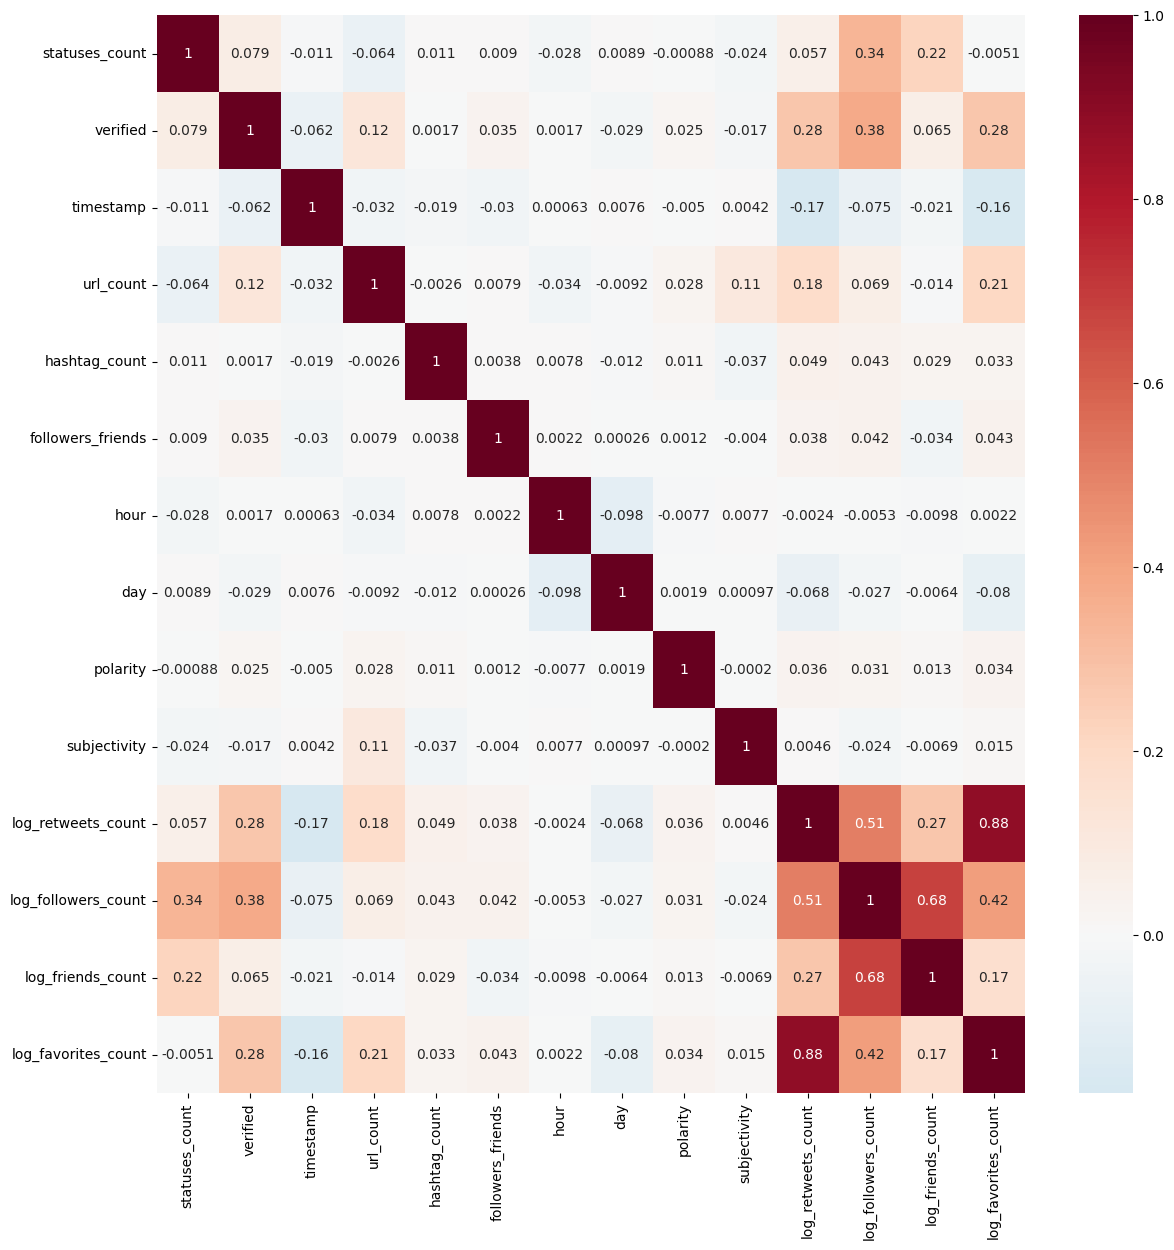

In [217]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(
    hierarchy.ward(train_data.corr()),no_plot=False)['ivl'], dtype="int")

rearranged_cov = train_data.corr().iloc[order, order]

plt.figure(figsize=(14, 14))

sbn.heatmap(train_data.corr(), annot=True, cmap="RdBu_r", center=0);